In [2]:
import pandas as pd
import trackpal as tp

from matplotlib import pyplot as plt

# Mean square displacement curves
## 1. Create some simulated tracks
1. Simulate tracks
 * brownian motion with set diffusion constant
 * transported, linear motion with set velocity


In [3]:
trj_brownian = tp.simulate.brownian(n_tracks=30, diffusion=3.14)
trj_linear   = tp.simulate.brownian_linear(n_tracks=30, velocity=2.71)

trackid = "TrackID"
frameid = "FRAME"
coords_xy = ["Position X", "Position Y"]

trj_brownian

,TrackID,FRAME,Position X,Position Y
0,0,0,96.499992,38.720307
1,0,1,95.142526,37.663377
2,0,2,96.345179,34.533546
3,0,3,96.534374,35.989905
4,0,4,93.721403,37.897730
...,...,...,...,...
1285,29,38,183.351485,21.143015
1286,29,39,187.239173,22.456896
1287,29,40,188.772388,21.629567
1288,29,41,189.958190,24.806414


## 2. Plot tracks

Text(0.5, 1.0, 'Transport')

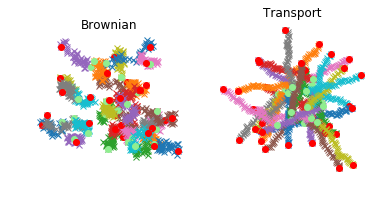

In [4]:
f, ax = plt.subplots(1,2)
trj_brownian.groupby(trackid).apply(tp.visu.plot_trj, coords=coords_xy, ax=ax[0], )
trj_linear.groupby(trackid).apply(tp.visu.plot_trj, coords=coords_xy, ax=ax[1],)

ax[0].set_title("Brownian")
ax[1].set_title("Transport");

## 3. Comptue mean displacement curves

In [5]:
msd_brownian  = tp.msd.curve(trj_brownian, coords=coords_xy, trackid=trackid, frame_interval=1)
msd_transport = tp.msd.curve(trj_linear, coords=coords_xy, trackid=trackid, frame_interval=1)

## 4. Plot curves

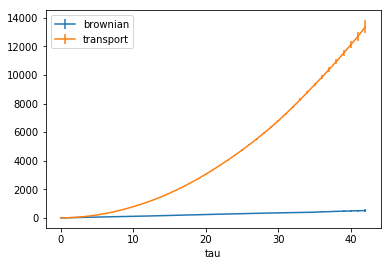

In [6]:
f, ax = plt.subplots()

msd_brownian.plot("tau", "mean", yerr="sem", ax=ax, label="brownian")
msd_transport.plot("tau", "mean", yerr="sem", ax=ax, label="transport")

## 5. Retrieve diffuison and velocity constant from MSD curves

In [7]:
tp.fit.line(msd_brownian["tau"], msd_brownian["mean"])

const                  1.219572
tau                   11.283619
diffusion_constant     2.820905
dtype: float64

In [8]:
tp.fit.parabola(msd_transport["tau"], msd_transport["mean"])

D           4.167270
velocity    2.735583
r2          0.999999
dtype: float64